# Supplementary Code for BDATA 200 Projects

Included in this iPy Notebook are the core functions and work for 
the data analysis performed in the project. This Repository will be used for
project two and will be updated accordingly. The subheadings correspond
with the function names for quick reference.

## Accessing the Data from IBM and Importing Packages

The data in this study comes from the US Bureau of Transportation Statistics, but is
made available through *IBM's Airline Reporting Carrier On-Time Performance Dataset*. So beyond importing the packages, this cell makes use of code provided by IBM to access the data in a useable format.

Included at the bottom is a sample of the data to save on compute-time in testing.

In [ ]:
import statsmodels.formula.api as smf
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import pylab
data_path = "airline_2m.csv"
#CSV Can be directly downloaded as a tar file here: 

#https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/airline_2m.tar.gz?_ga=2.241493383.460169643.1645306071-17791737.1643504108

# Credit to IBM's Airline Dataset for the data and encoding code.


data = pd.read_csv(data_path, encoding = "ISO-8859-1",
                 dtype={'Div1Airport': str, 'Div1TailNum': str, 'Div2Airport': str, 'Div2TailNum': str})
#Code Provided By IBMs Airline Reporting Carrier on-time performance set. 
#This helps python better interpret the data frame because it is not encoded in UTF-8 
#An alternative to this could be to actually change the file to be encoded in UTF-8
#but this was difficult to do with how big the file was.

sample = data.sample(10000)
#Create Sample For Examples

### originDelays

In [34]:
def originDelays(df, orig, desto):
    """
    This Function Takes in a dataframe from the Airline Dataset. 
    Then the Data is isolated strictly to the 1 dimensional frame of Arrival
    Delays for flights from one airport (IATA location ID) to another airport (" ").
    
    The arguments follow this format:
    
    originDelays(dataframe,string,string)
    
    
    """
    originSubset = df[df['Origin'] == orig]
    originSubset = originSubset[originSubset['Dest'] == desto ]
    #Shaves the DataFrame so that we are just looking at origin rows
    #Then cuts out desired destinations.
    
    print(originSubset['Origin'])
    #Print Statement To verify the Origin
    print(originSubset['Dest'])
    #Print Statement to verify the Destination

    arvl_delay = originSubset['ArrDelay'].fillna(0)
    #Takes out the Arrival Delay column, adds 0 for the NA spots 
    #NA spots infer no delay from IBMs Dataset
    
    qData = arvl_delay
    #Rename for sake of callability
    
    plt.hist(arvl_delay, bins='auto')
    #Constructs the histogram with automatic sizing
    plt.xlabel('Delay')
    #Delay in Minutes
    plt.ylabel('Frequency')
    #Plot a histogram for verification of data
    plt.show()
    
    print(stats.describe(qData))
    #Descriptive statistics to compare with Histogram
    
    sm.qqplot(qData, stats.norm, fit=True,line ='45', color = 'r', fmt = '.r')
    #The Normal Distribution Q-Q Plot
    
    sm.qqplot(qData, stats.skewnorm, fit=True,line ='45', color = 'b', fmt = '.b')
    #The Skewed Normal Distribution Q-Q Plot
    
    sm.qqplot(qData, stats.lognorm, fit=True,line ='45', color = 'y', fmt = '.y')
    #The LogNormal Distribution Q-Q Plot
    
    sm.qqplot(qData, stats.expon, fit=True,line ='45', color = 'g', fmt = '.g')
    #The Exponential Distribution Q-Q Plot
    
    plt.show()

### plotter

In [ ]:
def plotter(dataFrame, xColumn, yColumn):
    """
    This function takes in a dataframe, and two column names to 
    compare in a scatter plot.
    The arguments follow this format:
    plotter(dataframe, x column string, y column string) 
    
    """
    x = dataFrame[xColumn]
    y = dataFrame[yColumn]
    #Renamed x and y for clarity in scatter call
    
    plt.scatter(x,y)
    #Construct the scatter plot
    

### ols_models

In [5]:
def ols_model(df,x, y):
    """
    This Function takes in a dataframe and two columns of that 
    data frame to create a ordinary least squares regression and
    prints out a summary
    the arguments follow this format:
    ols_model(dataframe, dataframe[xcolumn],dataframe[ycolumn])
    
    """
    regression = smf.ols(formula = 'y ~ x', data = df).fit()
    #Performs an Ordinary Least Squares Regression
    
    summary = regression.summary()
    print(summary)
    return 

## Examples of the functions:

In [ ]:
plotter(sample,'AirTime','Distance')
#Example Call of Plotter

In [ ]:
ols_model(sample, sample['ArrDelay'],sample['Distance'])
#Example Call ols_model

991198     JFK
598756     JFK
846856     JFK
1447080    JFK
1681822    JFK
737000     JFK
539161     JFK
1478113    JFK
904800     JFK
384139     JFK
88381      JFK
1112544    JFK
1814439    JFK
370650     JFK
605621     JFK
463143     JFK
1374730    JFK
Name: Origin, dtype: object
991198     LAX
598756     LAX
846856     LAX
1447080    LAX
1681822    LAX
737000     LAX
539161     LAX
1478113    LAX
904800     LAX
384139     LAX
88381      LAX
1112544    LAX
1814439    LAX
370650     LAX
605621     LAX
463143     LAX
1374730    LAX
Name: Dest, dtype: object


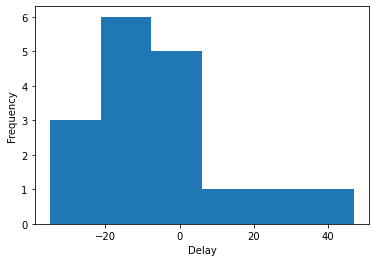

DescribeResult(nobs=17, minmax=(-35.0, 47.0), mean=-4.764705882352941, variance=388.4411764705883, skewness=1.0412837416808187, kurtosis=1.0918600659072384)


/Users/Gscott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".r" (-> marker='.'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/Gscott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".r" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/Gscott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".b" (-> marker='.'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/Gscott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: color is redundantly defined 

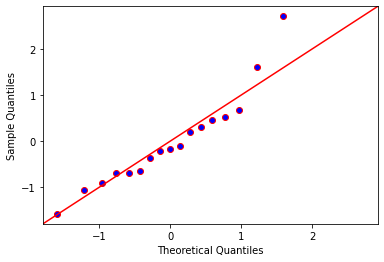

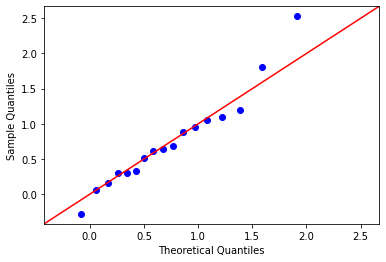

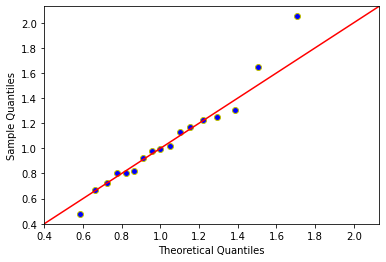

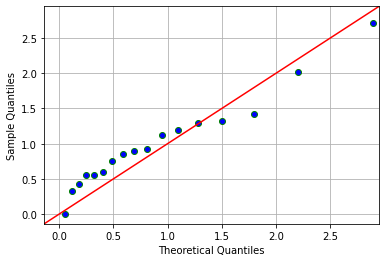

In [35]:
originDelays(sample , 'JFK', 'LAX')